In [55]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
#importing and fixing os due to error on MKL dataleak.  Currently just annoying but this fixes it.  
import os
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

In [56]:
dummy_df = pd.read_csv("dummy_df-94.csv")

dummy_df.head()

,Year,BDay,BMonth,GDP Growth,Population Growth,Name_Abraham Lincoln,Name_Andrew Jackson,Name_Andrew Johnson,Name_Barack Obama,Name_Benjamin Harrison,...,VP_office vacant,Party_Democrat,Party_Democratic-Republican,Party_Federalist,Party_Independent,Party_National Union,Party_Republican,Party_Whig,GDP Percent Growth,Population Percent Growth
0,1789,22,2,1,1,False,False,False,False,False,...,False,False,False,False,True,False,False,False,0.030,0.031
1,1790,22,2,1,1,False,False,False,False,False,...,False,False,False,False,True,False,False,False,0.029,0.030
2,1791,22,2,1,1,False,False,False,False,False,...,False,False,False,False,True,False,False,False,0.042,0.030
3,1792,22,2,1,1,False,False,False,False,False,...,False,False,False,False,True,False,False,False,0.048,0.030
4,1793,22,2,1,1,False,False,False,False,False,...,False,False,False,False,True,False,False,False,0.096,0.030


In [57]:
# Exclude the columns in y from dummy_df3
# GDP
y = dummy_df[['Party_Independent']]

# Define the target columns (y)
X = dummy_df.loc[:, ~dummy_df.columns.isin(y.columns)]


In [58]:
print(X.shape)  # Should be (n_samples, n_features)
print(y.shape)  # Should be (n_samples,) or (n_samples, 1)

(240, 97)
(240, 1)


In [59]:
# Split the preprocessed data into a training and testing dataset -- choose to stratify so that the classes are more balanced out bc it's a small dataset and imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, random_state=42)


In [60]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler on the training data
X_scaler = scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [61]:


# Initialize a multi-output classifier with logistic regression
classifier = MultiOutputClassifier(LogisticRegression())

# Fit the logistic regression model on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

#Tyler say -- list within list.... 

c:\Users\19727\Anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
from sklearn.metrics import accuracy_score
#accuracy score
accuracy_score(y_true= y_test, y_pred= y_pred)
# #do training and test scores
# train_score = accuracy_score(y_true= y_test, y_pred= y_pred)

1.0

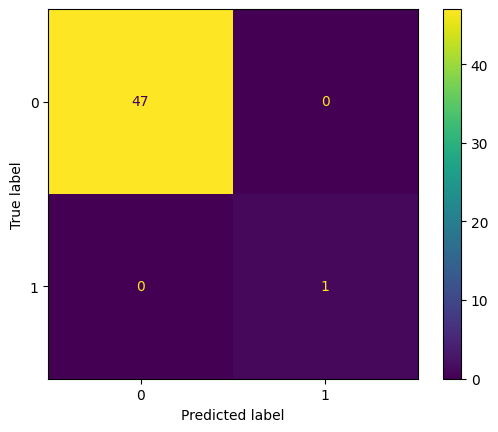

In [63]:

cm_df = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred))

cm_df

disp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred))
disp.plot()


In [64]:
# Print the classification report for the model
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        47
        True       1.00      1.00      1.00         1

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [67]:
# Extract feature importances (coefficients) for each output class
importances = []
for i, estimator in enumerate(classifier.estimators_):
    importances.append(pd.DataFrame({
        'feature': X_train.columns,  # assuming X_train is a DataFrame
        'importance': estimator.coef_[0],  # coef_ is used instead of feature_importances_
        'output_class': i
    }))

# Combine all feature importances into one DataFrame
df_importance = pd.concat(importances).sort_values(by='importance', ascending=False)

# Display the top 10 feature importances
df_importance.head(10)

#absolute value 

,feature,importance,output_class
67,VP_John Adams,1.791297,0
17,Name_George Washington,1.791297,0
3,GDP Growth,0.191978,0
4,Population Growth,0.137506,0
1,BDay,0.073358,0
96,Population Percent Growth,0.020526,0
95,GDP Percent Growth,0.002820,0
44,Name_Woodrow Wilson,0.001933,0
85,VP_Thomas R. Marshall,0.001933,0
92,Party_National Union,0.000814,0


In [68]:
importances = []
for i, estimator in enumerate(classifier.estimators_):
    # Get the absolute values of the coefficients
    abs_importances = abs(estimator.coef_[0])  # or np.abs(estimator.coef_[0])
    
    importances.append(pd.DataFrame({
        'feature': X_train.columns,  # assuming X_train is a DataFrame
        'importance': abs_importances,  # use absolute value of coefficients
        'output_class': i
    }))

# Combine all feature importances into one DataFrame
df_importance = pd.concat(importances).sort_values(by='importance', ascending=False)

# Display the top 10 most important features (absolute importance)
df_importance.head(10)

,feature,importance,output_class
17,Name_George Washington,1.791297,0
67,VP_John Adams,1.791297,0
89,Party_Democrat,0.683479,0
2,BMonth,0.561455,0
93,Party_Republican,0.520895,0
15,Name_Franklin Roosevelt,0.426194,0
88,VP_office vacant,0.403185,0
90,Party_Democratic-Republican,0.289814,0
70,VP_John N. Garner,0.214080,0
63,VP_Henry A. Wallace,0.212114,0
